[Back to Overview](overview.ipynb)

# Data Structures:  Keeping Data Organized
#### by Kirby Urner

Lets look at data from the perspective, first, of a user browsing the Web, and encountering information, perhaps updating it.

Then lets see how Python works with data using its own built-in structures.

Then, lastly, we'll feed some data to a Machine Learning algorithm and see if it figures out our pattern.

## 1. Anatomy of a Website

The verb "keep" is interesting, in that if you've studied the anatomy of castles, you'll know the central building, where the crown, jewels and sceptre are kept, is called the Keep.

Keeping Data, might be a term of art, although it currently isn't.

Sometimes, in fairy tales, [a dragon](https://tvtropes.org/pmwiki/pmwiki.php/Main/DragonHoard) keeps guard over [the hoard of treasure](https://youtu.be/MH49zLTeQsE).

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/31900281608/in/dateposted-public/" title="youtube_django"><img src="https://farm5.staticflickr.com/4883/31900281608_1851b05ce2.jpg" width="500" height="360" alt="youtube_django"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

<br/>
As you may have heard me explain in class, the smokey snake emerging from a genie lamp in this crudely drawn picture (below) represents Python.  

Authentication and data storage are likely two of its perviews (where storage is full CRUD:  Create Retrieve Update Delete).  

The Python DBI is well suited to chatting with SQL engines.  NoSQL engines (e.g. Neo4j) provide drivers as well.

That's all server-side behind the scenes.  The client browser puts on the JavaScript puppet show, meaning the client side stays responsive and animated in an asynchronous process teathered to the server through what we call AJAX, or more generally, backdoor exhanges of JSON, XML, HTTP and so on.

A classic web framework will provide a Model, View, Controller architecture (MVC), wherein the views show changes made in the model, in reaction to the controller doing stuff.

In [a tinyflask website](https://github.com/4dsolutions/tiny_flask), used in the course, we take a look at a simple anatomy, featuring Flask atop SQLite.

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/9583829639/in/photolist-27Qk7d8-XdQNYJ-VcSFee-oy7oP7-fATCE4-9oKHcV-9mV46z-8JMt7W-7uuc4g-7iy6jr-76Xswj-76XsFm-6WcupH-6QZD8h-6QVzKx-6y72Mo-6xXBCb-6xNgjY-5JVBmV-5z7Qey-5f9rAd-5f54mc" title="Browser as Theater"><img src="https://farm8.staticflickr.com/7301/9583829639_8199c0b3c6.jpg" width="500" height="375" alt="Browser as Theater"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

We introduce data structures through the lense of a website, because that's very typically how we intereact with data stores.

The Python language is designed from the ground up for working with data.

## 2. Built In Data Structures

Probably the first data structure you encounter in Python will be the list, although technically the string is a data structure (of letters, or str type objects).  

Then come the tuple (like an immutable list) and the dict (not even a sequence).  

All of these types use square brackets (`[]`) to retrieve contents, and matching up with square brackets are Python special names ```__getitem__``` and ```__setitem__```.

As Alex Martelli points out in one of his lectures, special names are deliberately "ugly" because we want to steer coders towards using square brackets when feasible.  Sometimes, though, we have to get behind the scenes, under the surface, into the guts of Python, and that's where special names (or ```__ribs___``` as I call them) come into focus.

In [1]:
### BUILT-IN DATA STRUCTURES

# TUPLE
the_tuple = (-1, 2, 3, 'a', '🐙', '🐳', '🐯')  # <-- emoji are Unicode

# LIST
the_list = list(the_tuple[3:])  # <-- slice off the first 3, grab the rest

# STRING
the_str = "".join(the_list)  # <-- glue list elements together with empty string

# DICT
the_dict = dict(zip(the_tuple[:-1], the_tuple[1:])) # <-- pair each element with next in line

for thing in the_tuple, the_list, the_str, the_dict:
    print("thing of", type(thing), thing, "\n")

thing of <class 'tuple'> (-1, 2, 3, 'a', '🐙', '🐳', '🐯') 

thing of <class 'list'> ['a', '🐙', '🐳', '🐯'] 

thing of <class 'str'> a🐙🐳🐯 

thing of <class 'dict'> {-1: 2, 2: 3, 3: 'a', 'a': '🐙', '🐙': '🐳', '🐳': '🐯'} 



The above code is pretty fancy, not "beginner" necessarily.  We start using slice notation, with a colon in brackets, right off the bat.  You'll see slices again when we get to Numpy.

Notice how square brackets keep cropping up, and with the same meaning:  we're using them to retreive (the R in CRUD).  Square brackets are also used to update.

In the case of sequence types (string, list, range, tuple...) we speak of "indexes".

In [2]:
the_list[1]

'🐙'

In the case of mappings (dicts), we speak of "keys".

In [3]:
the_dict['🐙']

'🐳'

The cell below demonstrates how ```__getitem__``` is the verb behind use of square brackets. 

```
obj[n]
``` 

translates to

```
obj.__getitem__(n)
``` 

in Python's mind (interpretation). 

Likewise... 

```
obj[n] = x
``` 

is the same as saying: 

```
obj.__setitem__(n) = x
```.

In review:

The code cell below emphasizes the uniformity of the API, meaning all these data structures use ```__getitem__``` to implement bracket syntax.

Notice that -1 means "last in line" when used as an index, but in the case of ```the_dict```, it's a key.  We would have to deal with a ```KeyError``` were a -1 key not included.

In [4]:
for thing in the_tuple, the_list, the_str, the_dict:  # all our data structures

    # use the special name __getitem__ in place of brackets
    print(thing.__getitem__(-1), end=", ")  # all four use __getitem__
    
    # now use brackets and so the answer is the same
    print(thing[-1]) # ... except in the case of the_dict, where it's a key, not an index

🐯, 🐯
🐯, 🐯
🐯, 🐯
2, 2


## 3. Machine Learning

The function below returns pseudo-random strings of 1s and 0s, of the requested length.  

We're going to use such strings to build a pseudo data set suitable for feeding to a Machine Learning algorithm.

In [5]:
from random import choice

def get_random_row(n):
    return "".join([str(choice([0,1])) for _ in range(n)])

for _ in range(5):
    sample = get_random_row(20)
    print(sample)

10100001000111010010
01111001010101010010
11110100010001011100
10000101110110100101
00110100010010101011


But first, lets introduce another data structure.

### NumPy's ndarray (3rd Party)

The next data structure we often encounter in a Pythonic project, if doing any kind of number crunching, is the star of numpy:  the n-dimensional array, or ndarray.

The cells below show ndarrays getting used in a typical fashion:  we feed them to a Machine Learning algorithm, a classifier.

Our example is deliberately meaningless, meaning we'll pick an arbitrary pattern of 1s and 0s to match with 1.

Remember chopsticks on the piano?  Think of an octave of white keys from C to shining C.  Chopsticks starts with adjacent (F,G) keys, then (E,G), then (D,B) and finally (C,C).  There's a symmetry to the pattern and a widening of the distance that is reminiscent of scissoring chopsticks.

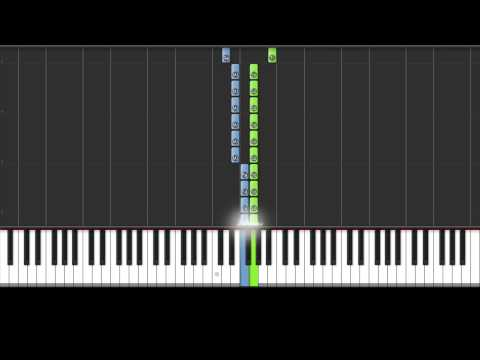

In [6]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('waraNMP0kK8')

If we model the octave with eight slots, and think of pressed keys as 1s, the rest 0, then our chopsticks key pattern is as follows:

```
00011000
00101000
01000010
10000001
```

We're only taking note pairs from the opening bars, to keep it simple.

Now think of a steady stream of random patterns.  We'll stipulate always eight slots containing 1 or 0, but that's the only rule. 

Genuine "chopstick" sequences will be few and far between, so we'll need a lot of samples if we want our machine to really learn.

Not having enough data is one of the many pitfalls when it comes to discerning patterns in data.

In [7]:
import numpy as np

def make_data(n, w, correct):
    """
    Make X of n samples, of w ints 1 and 0, 
    pairing each sequence with a Y such that:
    
    Yi == 1 if Xi is in correct
    Yi == 0 otherwise
    """
    X = np.empty(shape=(n, w), dtype=int) # n samples, w slots
    Y = np.empty(shape=(n, 1), dtype=int) # one answer per sample
    
    for row in range(n):
        features = get_random_row(w)
        y = 0  # unless a pattern matches   
        # Patterns
        if features in correct: 
            y = 1  # we have a match
            
        Y[row, 0]    = y  # record verdict
        # fancy list comprehension to convert strs to ints
        X[row, :] = list(map(lambda x: int(x), features))
        
    return X, Y

# here's where we decide 'how many' -- feel free to change that
chopsticks =  ['00011000','00101000', '01000010', '10000001']
train_samples, train_answers = make_data(10000, 8, chopsticks)

In [8]:
print(train_samples.shape)  # the key patterns
print(train_answers.shape)  # the answer column

(10000, 8)
(10000, 1)


In [9]:
train_samples[0:5]

array([[1, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0]])

In [10]:
train_answers[0:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

We may stack X and Y horizontally, side by side, just to see the eight keys, followed by a ninth column, 1 or 0, that flags the pattern as a chopstick or not.

In [11]:
np.hstack([train_samples[0:5], train_answers[0:5]])  # gluing arrays together sideways

array([[1, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0]])

As a check, lets print the first 10 rows for which the corresponding ```train_answer``` is 1.  

This is to be sure we understand which patterns match with 1, and to confirm the algorithm is working properly.

In [12]:
lines = 0
for idx, sample in enumerate(train_samples):
    if train_answers[idx]:  # lets only print chopsticks
        print(sample)
        lines += 1
    if lines > 10:
        break

[0 1 0 0 0 0 1 0]
[1 0 0 0 0 0 0 1]
[0 0 1 0 1 0 0 0]
[1 0 0 0 0 0 0 1]
[0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0]
[0 0 0 1 1 0 0 0]
[1 0 0 0 0 0 0 1]
[0 1 0 0 0 0 1 0]
[0 1 0 0 0 0 1 0]
[0 0 0 1 1 0 0 0]


Yep, that looks right.  We have the data we expect.  Lets feed it to a machine learning algorithm.

### Learning with scikit-learn (sklearn)

Now we're ready to take one of the Machine Learning algorithms down from the shelf.  Lets go with KNN and fit the training data so far.

Dimensionality matters:  the "right answer" column is expected to be one-dimensional, meaning we need to use ```ravel```.  Remember Y was (1000, 1).  After raveling, it's shape is simply (1000, ).

In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_samples, train_answers.ravel()) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

If the fitting went well, then we would expect any chopstick pattern, fed to predict, to come back with a 1.  Feel free to try a few.  Then we'll mass test on more data.

In [14]:
data = [1, 0, 0, 0, 0, 0, 0, 1]
test = np.array(data, dtype=float)
test = test.reshape((1,8))
neigh.predict(test)

array([1])

The cell below is about validating that our model is sea-worthy.  

We make new data, of course following the same pattern, and see if our model ```neigh``` is up to the job of recognizing for which patterns to predict a 1, all other times 0.

A score of 1 means it got everything right, nothing wrong.

In [15]:
test_samples, test_answers = make_data(50, 8, chopsticks)
neigh.score(test_samples, test_answers)

1.0

Lets try another Machine Learning algorithm.  How about a Multi-Layer Perceptron Classifier?

ML algorithms are like a stable of race horses.  You're free to have them compete.  See which one supplies the better predictive model.  

Will the MLP Classifier do better?  

In this case KNN looks hard to beat.

One of the joys of scikit-learn is the algorithms all take their data the same way, so we're pretty much able to cut and paste.

In [16]:
from sklearn.neural_network import MLPClassifier
neurons = MLPClassifier(solver='lbfgs', alpha=1e-5,
                         hidden_layer_sizes=(5, 2), random_state=1)
neurons.fit(train_samples, train_answers.ravel()) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
data = [1, 0, 0, 0, 0, 0, 0, 1]
test = np.array(data, dtype=float)
test = test.reshape((1,8))
neurons.predict(test)

array([0])

In [18]:
test_samples, test_answers = make_data(50, 8, chopsticks)
neurons.score(test_samples, test_answers)

0.98

Not so good?  But then look at all the hyper-parameters you have to play with.  

You could always "go deeper".  The term "deep learning" comes from having more layers of perceptrons.  The perceptrons get trained to fire or not in response to inputs, based on what they learn from their success rate.  

Maximizing success (minimizing error) involves fine tuning all the myriad feedback loops connecting perceptrons into a network.

Or try training on even more data.  Neural networks need lots of grist for the mill sometimes.

Let's try another, just to illustrate the consistency of the scikit-learn API.  The Support Vector Machine may also function as a classifier.

In [19]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_samples, train_answers.ravel())  
test_samples, test_answers = make_data(50, 8, chopsticks)
clf.score(test_samples, test_answers)

1.0

I got a perfect score, did you?  You may not always.

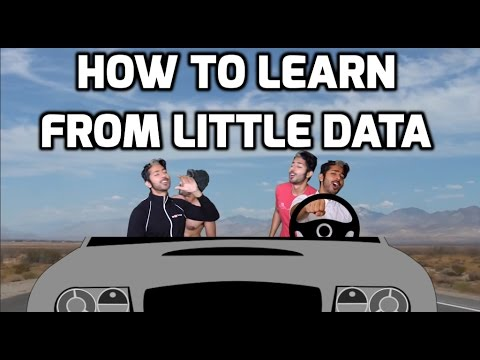

In [20]:
YouTubeVideo('tChcZpBbTTA')

### Big Data

Little Data is very important i.e. "big" does not mean "more meaningful" it just means "more data" often a lot more.  

When the data takes up a lot of space, then how it's managed, and how it's run through Machine Learning algorithms, becomes a topic in itself. Additional tools enter the picture, such as Apache Spark and Hadoop.

### Further Reading

[Another Pathway Through Python](https://medium.com/@kirbyurner/another-pathway-through-python-ace238a7437d), a story on Medium (November, 2018)

[Remarks on edu-sig](https://mail.python.org/pipermail/edu-sig/2018-November/012032.html) (November, 2018)